# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
weather_api_key

'845ecb920cb4e0df16aec9c424da18ef'

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] 
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"] 
        city_wind = city_weather["wind"]["speed"] 
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | porosozero
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | ephrata
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | inhambane
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | leshukonskoye
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | ipojuca
Processing Record 12 of Set 1 | mrirt
City not found. Skipping...
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | tazovskiy
Processing Record 17 of Set 1 | lydenburg
Processing Record 18 of Set 1 | vao
Processing Record 19 of Set 1 | buritizeiro
Processing Record 20 of Set 1 | okato
Processing Record 21 of Set 1 | manggar
Processing Record 22 of Set 1 | the vall

Processing Record 38 of Set 4 | jishou
Processing Record 39 of Set 4 | price
Processing Record 40 of Set 4 | pemberton
Processing Record 41 of Set 4 | dubenskiy
City not found. Skipping...
Processing Record 42 of Set 4 | gondar
Processing Record 43 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 4 | ouranopolis
City not found. Skipping...
Processing Record 45 of Set 4 | san ramon
Processing Record 46 of Set 4 | vostok
Processing Record 47 of Set 4 | lolua
City not found. Skipping...
Processing Record 48 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 49 of Set 4 | la palma
Processing Record 0 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 1 of Set 5 | lufilufi
Processing Record 2 of Set 5 | nabire
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | clyde river
Processing Record 5 of Set 5 | olivet
Processing Record 6 of Set 5 | georgetown
Processing Record 7 of Set 5 | norrtalje
Processing Record 8

Processing Record 22 of Set 8 | nador
Processing Record 23 of Set 8 | isangel
Processing Record 24 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 25 of Set 8 | sabha
Processing Record 26 of Set 8 | simao
Processing Record 27 of Set 8 | faya
Processing Record 28 of Set 8 | meyungs
City not found. Skipping...
Processing Record 29 of Set 8 | villa sandino
Processing Record 30 of Set 8 | alto lucero
Processing Record 31 of Set 8 | kendrapara
Processing Record 32 of Set 8 | evensk
Processing Record 33 of Set 8 | wagga wagga
Processing Record 34 of Set 8 | atherton
Processing Record 35 of Set 8 | litovko
Processing Record 36 of Set 8 | catole do rocha
Processing Record 37 of Set 8 | tautira
Processing Record 38 of Set 8 | springdale
Processing Record 39 of Set 8 | skibbereen
Processing Record 40 of Set 8 | pauini
Processing Record 41 of Set 8 | tiksi
Processing Record 42 of Set 8 | ponta delgada
Processing Record 43 of Set 8 | kichmengskiy gorodok
Processing Record 44 of S

Processing Record 12 of Set 12 | harper
Processing Record 13 of Set 12 | chalus
Processing Record 14 of Set 12 | casas grandes
Processing Record 15 of Set 12 | christchurch
Processing Record 16 of Set 12 | jaque
Processing Record 17 of Set 12 | mackenzie
Processing Record 18 of Set 12 | sao felix do xingu
Processing Record 19 of Set 12 | bundaberg
Processing Record 20 of Set 12 | korsor
Processing Record 21 of Set 12 | ukiah
Processing Record 22 of Set 12 | fairbanks
Processing Record 23 of Set 12 | beyneu
Processing Record 24 of Set 12 | kintinku
Processing Record 25 of Set 12 | margate
Processing Record 26 of Set 12 | babakan
Processing Record 27 of Set 12 | mitchell
Processing Record 28 of Set 12 | sinop
Processing Record 29 of Set 12 | copperas cove
Processing Record 30 of Set 12 | harrismith
Processing Record 31 of Set 12 | aranos
Processing Record 32 of Set 12 | ano mera
Processing Record 33 of Set 12 | cape coast
Processing Record 34 of Set 12 | tallahassee
Processing Record 35 

In [7]:
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -110.6683, 'lat': 50.0501},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': -8.96,
  'feels_like': -12.99,
  'temp_min': -9.76,
  'temp_max': -7.31,
  'pressure': 1000,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 2.06, 'deg': 250},
 'clouds': {'all': 100},
 'dt': 1677559441,
 'sys': {'type': 2,
  'id': 2011978,
  'country': 'CA',
  'sunrise': 1677507037,
  'sunset': 1677546034},
 'timezone': -25200,
 'id': 6071618,
 'name': 'Medicine Hat',
 'cod': 200}

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,porosozero,62.7191,32.7270,-6.15,69,66,7.36,RU,1677559298
1,bethel,41.3712,-73.4140,0.20,85,100,4.12,US,1677559009
2,rikitea,-23.1203,-134.9692,27.13,75,1,7.38,PF,1677559299
3,ephrata,40.1798,-76.1788,2.54,86,100,4.12,US,1677559299
4,ushuaia,-54.8000,-68.3000,7.81,81,0,2.57,AR,1677559300


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,porosozero,62.7191,32.7270,-6.15,69,66,7.36,RU,1677559298
1,bethel,41.3712,-73.4140,0.20,85,100,4.12,US,1677559009
2,rikitea,-23.1203,-134.9692,27.13,75,1,7.38,PF,1677559299
3,ephrata,40.1798,-76.1788,2.54,86,100,4.12,US,1677559299
4,ushuaia,-54.8000,-68.3000,7.81,81,0,2.57,AR,1677559300


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

Text(0, 0.5, 'Max Temperature')

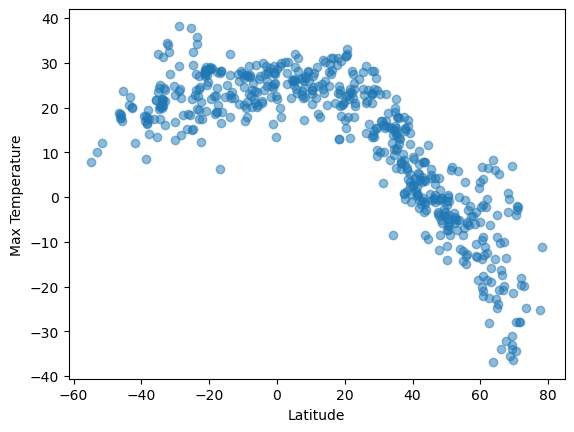

In [17]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(lat, temp, alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE